# Colab Test Etme

In [ ]:
print("hello world")

hello world


# **TENSORFLOW KÜTÜPHANESİNİN YÜKLENMESİ**

In [ ]:
pip install tensorflow

# **GEREKLİ KÜTÜPHANELERİN İMPORT EDİLMESİ*

In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import load_model,Sequential


from tensorflow.keras.layers import Dense,Flatten

from tensorflow.keras.utils import to_categorical,plot_model

import matplotlib.pyplot as plt

import numpy as np

import warnings

from warnings import filterwarnings

warnings.filterwarnings("ignore",category=DeprecationWarning)

warnings.filterwarnings("ignore",category=FutureWarning)

warnings.filterwarnings("ignore",category=UserWarning)

filterwarnings("ignore")

# **MNIST VERİ SETİNİN YÜKLENMESİ**







In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **VERİ SETİNİN BOYUTU**

In [ ]:
print("Eğitim Veri Boyutu :",x_train.shape,y_train.shape)

Eğitim Veri Boyutu : (60000, 28, 28) (60000,)


# **Eğitim Seti Hedef Değişken Sayısı**

In [ ]:
num_labels = len(np.unique(y_train))

num_labels

10

# **Veri Setinin Bir Kısmının Grafik üzerinde gösterilmesi**

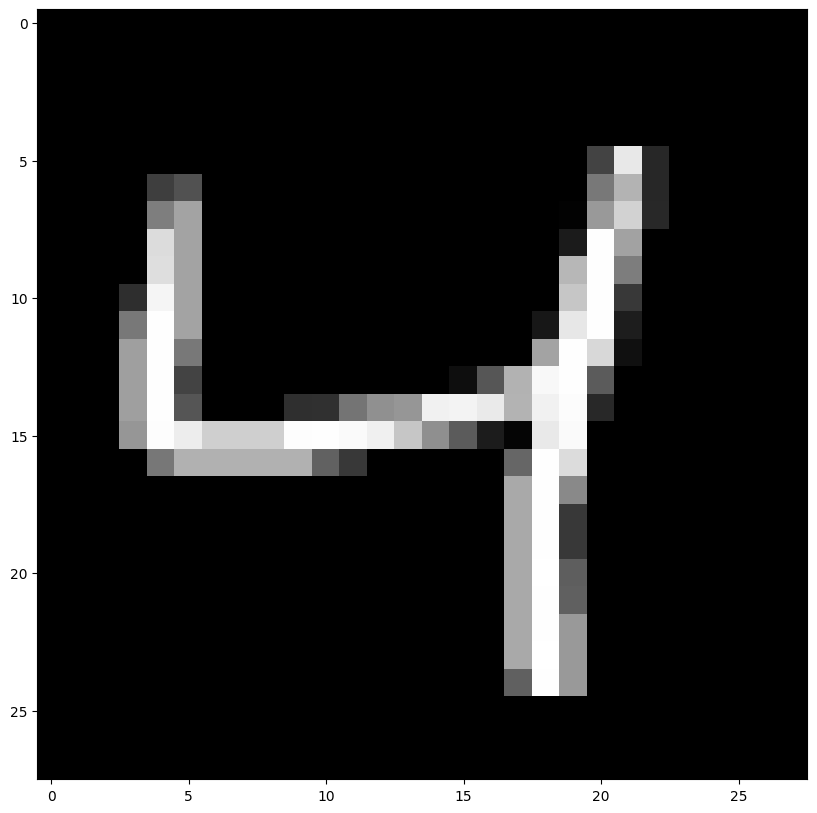

In [ ]:
plt.figure(figsize=(10,10))

plt.imshow(x_train[2],cmap="gray")


# **İlk 10 Verinin Gösterilmesi**

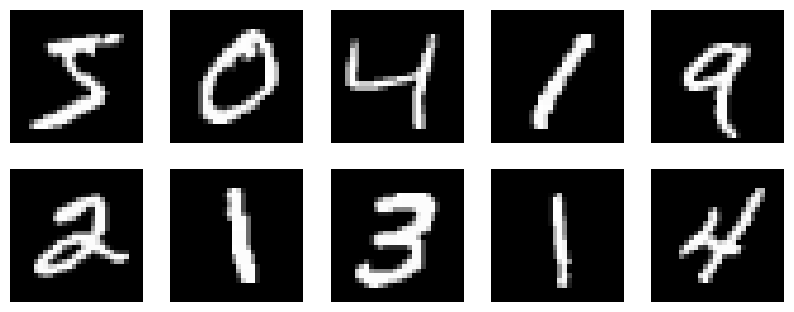

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):

   ax = plt.subplot(5,5,i+1)


   plt.imshow(x_train[i],cmap="gray")

   plt.axis("off")



# **Resim Göstermenin Fonksiyon Haline Getirilmesi**

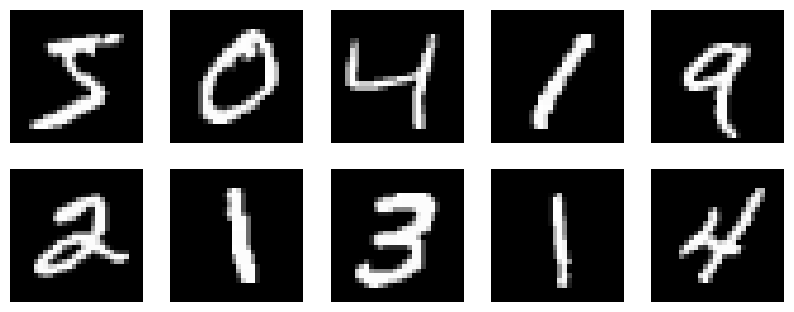

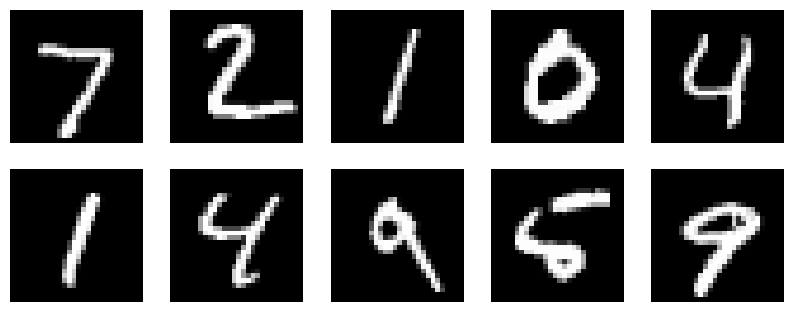

In [ ]:
def visualize_img(data):

  plt.figure(figsize=(10,10))
  for i in range(10):

    ax = plt.subplot(5,5,i+1)


    plt.imshow(data[i],cmap="gray")

    plt.axis("off")

visualize_img(x_train)

visualize_img(x_test)

# **RGB RENK SKALASI**

In [ ]:
#RGB(0-255)

# R:250 G:10 B:240 => koyu mor





# **X TRAİN 3 BOYUTU**

In [ ]:
x_train[3].shape

(28, 28)

# **VERİYİ DAHA İYİ ANLAMAK İÇİN 4.RESMİN 10.SATIR VE 10. SÜTUNDAKİ DEĞERİNİ GÖR**

In [ ]:
x_train[3][10,10]

0

# **4.RESMİN ORTALAMASINI ALMA**

In [ ]:
x_train[3].mean()

21.855867346938776

# **4.RESİM İÇİN BELLİ BİR BÖLGENİN ORTALAMASINI ALMA**

In [ ]:
x_train[3][14:20,10:20].mean()

90.18333333333334

# **4 NUMARALI RESMİ PİXELDEN RESME ÇEVİRME**

# **BU İŞLEMİN FONKSİYON OLARAK TANIMI**

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap="gray")
  width,height = img.shape
  threshold = img.max() / 2.5
  for i in range(width):
    for j in range(height):
      ax.annotate(str(round(img[i][j] , 2)),xy = (j,i),
                  color = "white" if img[i][j]<threshold
                  else "black")




# **BU FONKSİYONUN ÇAĞRILIP İŞLEMİN TAMAMLANMASI**

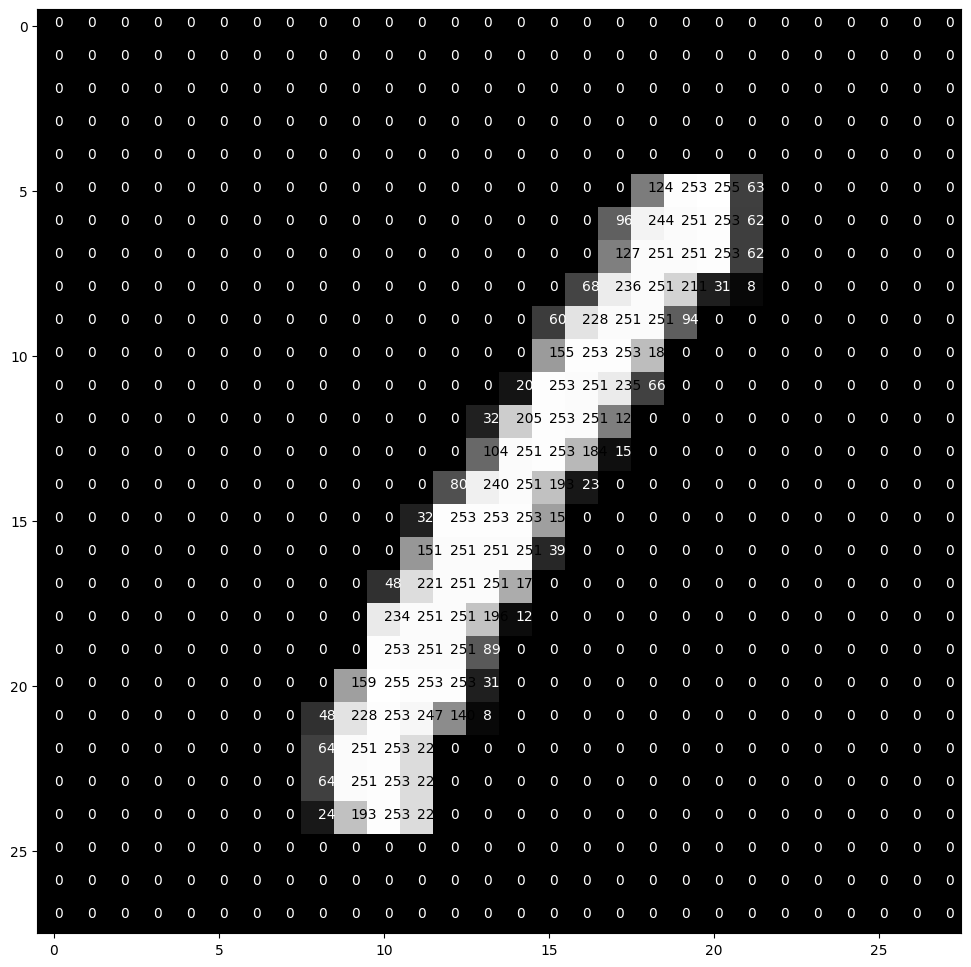

In [ ]:
pixel_visualize(x_train[3])

# **ENCODİNG**

# ÖNCE : 0 1 2 3 4 5 6 7 8 9

# SONRA : 0 0 1 0 0 0 0 0 0

In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_train[0:5]



array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# **RESHAPİNG**

In [ ]:
image_size = x_train.shape[1]

In [ ]:
image_size

28

In [ ]:
print(f"x_train boyutu : {x_train.shape}")

print(f"x_test boyutu : {x_test.shape}")


x_train boyutu : (60000, 28, 28)
x_test boyutu : (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu : {x_train.shape}")

print(f"x_test boyutu : {x_test.shape}")

x_train boyutu : (60000, 28, 28, 1)
x_test boyutu : (10000, 28, 28, 1)


# **NORMALİZATİON**

In [ ]:
x_train = x_train.astype("float32")/255

x_test = x_test.astype("float32")/255

# **MODELLİNG(MODELLEME)**

# **SİNİR AĞI MİMARİSİNİ TANIMLAMAK**

In [ ]:
model = tf.keras.Sequential(
    [
        Flatten(input_shape = (28,28,1)),

        Dense(128,activation="relu",name="layer1"),

        Dense(units=num_labels,activation="softmax",name="output_layer")
    ]


)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])



# **MİMARİYE GENEL BAKIŞ**

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# **MODEL EĞİTİMİ**

In [ ]:
model.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8279 - loss: 0.6292 - precision: 0.9358 - recall: 0.6972 - val_accuracy: 0.9445 - val_loss: 0.1904 - val_precision: 0.9573 - val_recall: 0.9308
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9492 - loss: 0.1802 - precision: 0.9611 - recall: 0.9386 - val_accuracy: 0.9597 - val_loss: 0.1399 - val_precision: 0.9668 - val_recall: 0.9522
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9627 - loss: 0.1267 - precision: 0.9711 - recall: 0.9562 - val_accuracy: 0.9661 - val_loss: 0.1150 - val_precision: 0.9721 - val_recall: 0.9602
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9712 - loss: 0.1005 - precision: 0.9769 - recall: 0.9661 - val_accuracy: 0.9699 - val_loss: 0.0990 - val_precision: 0.9747 - val_recall: 0.9664
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9786 - loss: 0.0753 - precision: 0.9826 - recall: 0.9750 - val_accuracy: 0.9716 - val_loss: 0.

# **MODEL BAŞARISINI DEĞERLENDİRME**

In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test))




Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 5.1052e-04 - precision: 0.9999 - recall: 0.9999 - val_accuracy: 0.9807 - val_loss: 0.1019 - val_precision: 0.9814 - val_recall: 0.9804
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 2.2989e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9809 - val_loss: 0.1016 - val_precision: 0.9816 - val_recall: 0.9805
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 1.9966e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9804 - val_loss: 0.1024 - val_precision: 0.9813 - val_recall: 0.9803
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 1.6016e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9804 - val_loss: 0.1021 - val_precision: 0.9809 - val_recall: 0.9803
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 1.4016e-04 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0

# **EĞİTİM VE TEST SETİN DOĞRULUK GRAFİĞİ**

Text(0.5, 1.0, 'Training and Validation Accuracy')

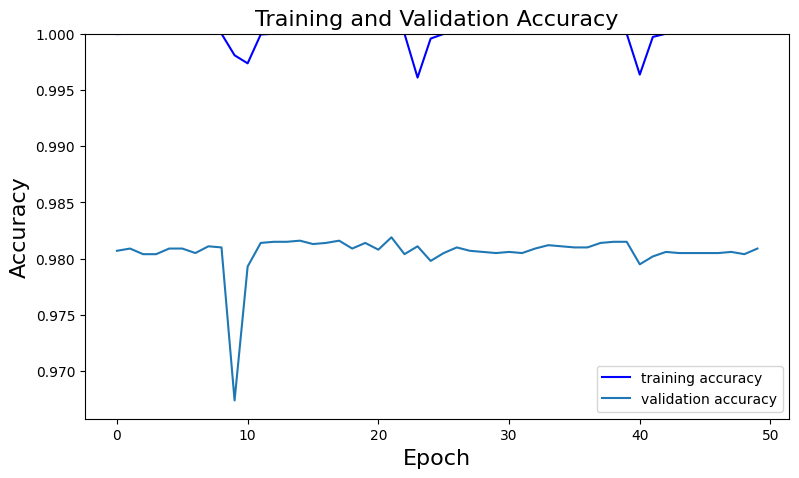

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,2)

plt.plot(history.history["accuracy"],color="b",label="training accuracy")

plt.plot(history.history["val_accuracy"],label="validation accuracy")

plt.legend(loc="lower right")

plt.xlabel("Epoch",fontsize=16)

plt.ylabel("Accuracy",fontsize=16)

plt.ylim([min(plt.ylim()),1])

plt.title("Training and Validation Accuracy",fontsize=16)

# **EĞİTİM VE TEST KAYIP GRAFİĞİ**

Text(0.5, 1.0, 'Training and Validation Loss')

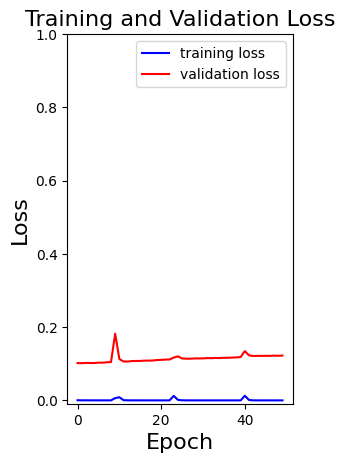

In [ ]:


plt.subplot(1,2,2)

plt.plot(history.history["loss"],color="b",label="training loss")

plt.plot(history.history["val_loss"],color="r",label="validation loss")

plt.legend(loc="upper right")

plt.xlabel("Epoch",fontsize=16)

plt.ylabel("Loss",fontsize=16)

plt.ylim([min(plt.ylim()),1])

plt.title("Training and Validation Loss",fontsize=16)

# **LOSS,ACCURACY,PRECİSİON,RECALL METRİKLERİ'NİN DEĞERLENDİRİLMESİ**

In [ ]:
loss,precision,recall,accuracy = model.evaluate(x_test,y_test,verbose=False)

print("\nLoss : ",loss)

print("\nPrecision : ",precision)

print("\nRecall : ",recall)

print("\nAccuracy : ",accuracy)


Loss :  0.12242533266544342

Precision :  0.9810943007469177

Recall :  0.9807999730110168

Accuracy :  0.98089998960495


# ***MODELE KAYDEDİLMESİ VE TAHMİN İÇİN KULLANILMASI***

In [ ]:
model.save("mnist_model.h5")

In [ ]:
import random

random = random.randint(0,x_test.shape[0])

random


5106

In [ ]:
test_image = x_test[random]

test_image

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

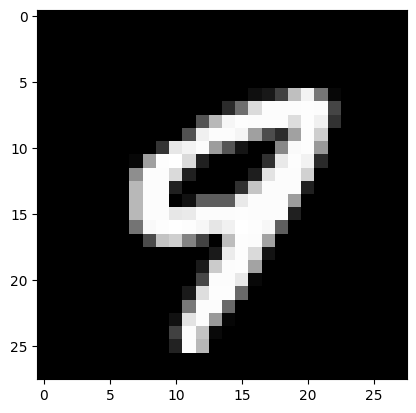

In [ ]:
plt.imshow(test_image.reshape(28,28),cmap="gray")

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
predictability = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [ ]:
predictability

array([[7.8491137e-25, 3.1529534e-35, 3.2940317e-22, 1.0796218e-22,
        1.3426777e-12, 8.0929414e-22, 1.4265568e-28, 1.4039177e-17,
        7.2396736e-15, 1.0000000e+00]], dtype=float32)

In [ ]:
predicted_class = np.argmax(predictability)

In [ ]:
predicted_class

9

In [ ]:
print(f"TAHMİN EDİLEN SINIF : {predicted_class}\n")

print(f"TAHMİN EDİLEN SINIFIN OLASILIK DEĞERİ : {predictability[0][predicted_class]} \n")
# Access the probability value from predictability using predicted_class as the index.

print(f"DİĞER SINIFLARIN OLASILIK DEĞERLERİ : \n {predictability}")

TAHMİN EDİLEN SINIF : 9

TAHMİN EDİLEN SINIFIN OLASILIK DEĞERİ : 1.0 

DİĞER SINIFLARIN OLASILIK DEĞERLERİ : 
 [[7.8491137e-25 3.1529534e-35 3.2940317e-22 1.0796218e-22 1.3426777e-12
  8.0929414e-22 1.4265568e-28 1.4039177e-17 7.2396736e-15 1.0000000e+00]]
